# Classification models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data 

In [2]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\FinalFullDataWatchAct.csv')

In [3]:
dataFrame.head()

,Unnamed: 0,index,timestamp,index_activity,activity,heart_rate,gyroscope_X,gyroscope_Y,gyroscope_Z,orientation_X,orientation_Y,orientation_Z,accelerometer_X,accelerometer_Y,accelerometer_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,battery,pressure
0,0,0,2017-06-29 09:57:00,0.0,Eat,74.500000,0.239771,-0.002628,-0.223755,79.680770,18.019663,53.085002,-6.929031,-2.798776,0.388177,28.776245,4.395142,-26.474915,82.0,963.911814
1,1,1,2017-06-29 09:57:30,0.0,Eat,76.875000,-1.027466,0.728256,0.866241,122.794534,7.547025,87.135285,-8.889236,-2.654816,1.480637,42.903137,-9.513855,-25.811768,82.0,964.412230
2,2,2,2017-06-29 09:58:00,0.0,Eat,83.500000,-1.385284,1.318619,1.436371,144.739604,3.635352,88.689077,-11.005234,-4.207565,2.818146,28.717041,-23.501587,-18.550110,81.5,965.146670
3,3,3,2017-06-29 09:59:00,0.0,Eat,78.411429,-0.003113,-0.310699,-1.348114,77.601256,-5.988203,94.542864,-9.931454,-4.263046,1.531603,39.378357,-0.975037,-10.728455,81.0,963.865050
4,4,4,2017-06-29 09:59:30,0.0,Eat,73.322857,0.115019,-0.297179,-0.684662,47.057193,-5.988203,94.542864,-8.857675,-4.318527,0.245060,-11.760711,16.645813,-20.403798,81.0,963.691622


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3971 non-null   int64  
 1   index            3971 non-null   int64  
 2   timestamp        3971 non-null   object 
 3   index_activity   3971 non-null   float64
 4   activity         3971 non-null   object 
 5   heart_rate       3971 non-null   float64
 6   gyroscope_X      3971 non-null   float64
 7   gyroscope_Y      3971 non-null   float64
 8   gyroscope_Z      3971 non-null   float64
 9   orientation_X    3971 non-null   float64
 10  orientation_Y    3971 non-null   float64
 11  orientation_Z    3971 non-null   float64
 12  accelerometer_X  3971 non-null   float64
 13  accelerometer_Y  3971 non-null   float64
 14  accelerometer_Z  3971 non-null   float64
 15  magnetometer_X   3971 non-null   float64
 16  magnetometer_Y   3971 non-null   float64
 17  magnetometer_Z

In [5]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','index','timestamp','activity','index_activity'])
FeaturesTable.head()

,heart_rate,gyroscope_X,gyroscope_Y,gyroscope_Z,orientation_X,orientation_Y,orientation_Z,accelerometer_X,accelerometer_Y,accelerometer_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,battery,pressure
0,74.500000,0.239771,-0.002628,-0.223755,79.680770,18.019663,53.085002,-6.929031,-2.798776,0.388177,28.776245,4.395142,-26.474915,82.0,963.911814
1,76.875000,-1.027466,0.728256,0.866241,122.794534,7.547025,87.135285,-8.889236,-2.654816,1.480637,42.903137,-9.513855,-25.811768,82.0,964.412230
2,83.500000,-1.385284,1.318619,1.436371,144.739604,3.635352,88.689077,-11.005234,-4.207565,2.818146,28.717041,-23.501587,-18.550110,81.5,965.146670
3,78.411429,-0.003113,-0.310699,-1.348114,77.601256,-5.988203,94.542864,-9.931454,-4.263046,1.531603,39.378357,-0.975037,-10.728455,81.0,963.865050
4,73.322857,0.115019,-0.297179,-0.684662,47.057193,-5.988203,94.542864,-8.857675,-4.318527,0.245060,-11.760711,16.645813,-20.403798,81.0,963.691622


In [6]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'Running', 'In computer', 'Meeting', 'Sleep',
       'Video games', 'Picnic ', 'Watching TV', 'Cooking', 'Movie',
       'Pause', 'Football'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='activity'>

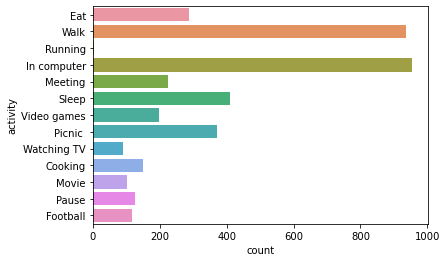

In [7]:
sns.countplot(y = label, data = label)

## Split Train and Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42,shuffle=False)

Text(0.5, 1.0, 'Train Datset')

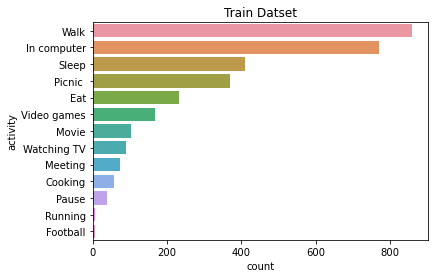

In [9]:
sns.countplot(y = y_train, order = y_train.value_counts().index).set_title('Train Datset')

Text(0.5, 1.0, 'Test Datset')

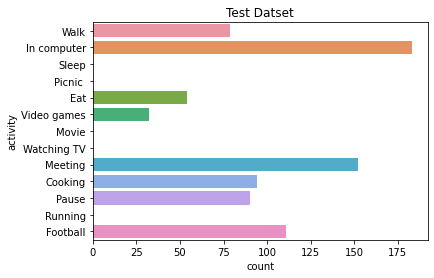

In [10]:
sns.countplot(y = y_test,order = y_train.value_counts().index).set_title('Test Datset')

## Standardize the Variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## Models

### Examining different models with different parameters

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

class PipelinesListMixin(object):
    @property
    def meta_estimators(self):
        scoring = 'f1_weighted'

        # Logistic Regression
        pipe_lr = Pipeline([('scl', StandardScaler()),
                            ('lr',  LogisticRegression(random_state=0))])
        param_grid = [{'lr__C': [10 ** int(C) for C in np.arange(-5, 5)],
                       'lr__penalty': ['l2', 'l1'],
                       'lr__class_weight': ['balanced',None]}]
        gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # SVM
        pipe_svm = Pipeline([('scl', StandardScaler()),
                            ('svm', SVC(random_state=0))])
        param_grid = [{'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__kernel': ['linear']},
                      {'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__gamma': ['auto'],
                        'svm__kernel': ['rbf'],
                        'svm__class_weight': ['balanced',None]}]
        gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # Tree
        pipe_tree = Pipeline([('tree', DecisionTreeClassifier(random_state=0))])
        param_grid = [{'tree__criterion': ['entropy'],
                       'tree__max_depth': [3],
                       'tree__class_weight': ['balanced',None]}]
        gs_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=scoring, cv=2,
                                n_jobs=5)

        # Adaboost
        tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)
        pipe_ada = Pipeline([('adaboost', AdaBoostClassifier(base_estimator=tree, random_state=0))])
        param_grid = [{'adaboost__n_estimators': [500],
                       'adaboost__learning_rate': [0.1]}]
        gs_ada = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
 
        # Forest
        pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
        param_grid = [{'forest__criterion': ['entropy'],
                       'forest__n_estimators': [10],
                       'forest__max_depth': [None, 10, 20, 30],
                       'forest__class_weight':['balanced',None]}]
        gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring=scoring, cv=2,
                                  n_jobs=5)

        # KNN
        pipe_knn = Pipeline( [('knn', KNeighborsClassifier())])
        param_grid = [{'knn__n_neighbors': [5],
                       'knn__p': [2]}]
        gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
        
        return [gs_lr, gs_svm, gs_ada, gs_tree, gs_forest, gs_knn] 


class ComparingClassifiers(PipelinesListMixin):
    def fit(self, X, y, scoring):
        algorithm_scores = []
        for gs in self.meta_estimators:
            #In each cross validation of cross_val_score function the GridSearchCV (gs) is working and run internal cross validation.
            #The aim is to do another level of validation set - for selecting the best algorithm.
            scores = cross_val_score(gs, X, y, scoring=scoring, cv=5, n_jobs=10)
            mean_scores = np.mean(scores) # Scores of all best models of the same algorithm (on each of the iterations of the outer cross validation).
            algorithm_scores.append(mean_scores)
            print('Mean score: ${:.3f}$ for algorithm: ${}$'.format(mean_scores, gs.estimator.steps[-1][0]))
        best_grid_search = self.meta_estimators[np.argmax(algorithm_scores)]
        return best_grid_search.fit(X, y)

best_algorithm = ComparingClassifiers().fit(X_train, y_train, 'f1_weighted')
print('The best algorithm is: ${}$. The accurate on all training data is: ${}$'.format(best_algorithm.estimator.steps[-1][0], best_algorithm.score(X_train, y_train)))

Mean score: $0.419$ for algorithm: $lr$
Mean score: $0.513$ for algorithm: $svm$
Mean score: $0.136$ for algorithm: $adaboost$
Mean score: $0.345$ for algorithm: $tree$
Mean score: $0.555$ for algorithm: $forest$
Mean score: $0.361$ for algorithm: $knn$
The best algorithm is: $forest$. The accurate on all training data is: $0.9984237394996854$


In [14]:
# Check model preformance on the best model 
from sklearn.metrics import classification_report,confusion_matrix
pred = best_algorithm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0 25  0  6  0  0  0 28 33  0  2]
 [ 0  0  0  1  0  1  0 15 36  0  1]
 [ 0  1 30 14  0  0  0  3  0  0 63]
 [ 0 12  0 43  0  0  0 52 60  0 16]
 [15 18  0 53  0 29  0  8 11  4 14]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  1  0  0  0  3 75  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  1  0  0  3]
 [ 0 16  0 14  0  0  0 31  2  0 16]]
              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00        94
         Eat       0.00      0.00      0.00        54
    Football       1.00      0.27      0.43       111
 In computer       0.27      0.23      0.25       183
     Meeting       0.00      0.00      0.00       152
       Movie       0.00      0.00      0.00         0
       Pause       0.00      0.00      0.00        90
     Picnic        0.00      0.00      0.00         0
       Sleep       0.00      0.00      0.00         0
 Video games       0.00      0.00      0.00        32
        

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3

In [15]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
param_grid = [{'forest__criterion': ['entropy'],
                'forest__n_estimators': [10],
                'forest__max_depth': [None, 10, 20, 30],
                'forest__class_weight':[None]}]
gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring='f1_weighted', cv=2,
                            n_jobs=5)

gs_forest.fit(X_train, y_train)
best_params = gs_forest.best_params_
best_max_depth = best_params['forest__max_depth']
print("Best Max Depth:", best_max_depth)

best_class_weight = best_params['forest__class_weight']
print("Class Weight:", best_class_weight)

Best Max Depth: None
Class Weight: balanced


### Performance analysis of the best model

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=10, random_state=0, class_weight=None)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0 30  0 15  0  0  0 11 35  0  3  0]
 [ 0  0  0  3  0  0  0 14 33  0  4  0]
 [ 0  2 21 26  0  0  0  7  0  0 54  1]
 [ 0 28  0 11  0  0  0 68 71  0  5  0]
 [15  8  0 46  1 21  1  7 24 17 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 88  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0 19  0  0  2  0]
 [ 0 17  0  6  0  0  0 47  2  2  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00        94
         Eat       0.00      0.00      0.00        54
    Football       1.00      0.19      0.32       111
 In computer       0.09      0.06      0.07       183
     Meeting       1.00      0.01      0.01       152
       Movie       0.00      0.00      0.00         0
       Pause       0.00      0.00      0.00        90
     Picnic        0.00      0.00      0.00         0
       Sleep       0.00      0.00      0.00 

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the importance of each feature

In [17]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

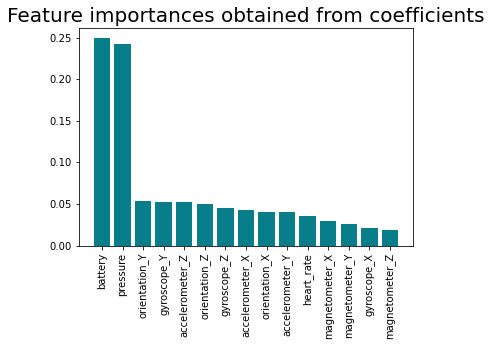

In [18]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Re-run the model using only the 5 most important features

In [19]:
print(importances['Attribute'][:5])

13            battery
14           pressure
5       orientation_Y
2         gyroscope_Y
9     accelerometer_Z
Name: Attribute, dtype: object


In [20]:
featurereList = list(importances['Attribute'][:5])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [21]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=10, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  0   0   0  20   0   0   0  32  42   0   0   0]
 [  0   0   0   0   0   0   0  17  37   0   0   0]
 [  0   1  41  21   0   0   0   2   0   0  45   1]
 [  0   2   0   3   0   0   0 112  65   1   0   0]
 [  0  22   0  25   0  33   1   0  27   6  38   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0  86   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  31   0   0   0   0]
 [  0  15   0   1   0   0   0  43   1   0  19   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00        94
         Eat       0.00      0.00      0.00        54
    Football       1.00      0.37      0.54       111
 In computer       0.04      0.02      0.02       183
     Meeting       0.00      0.00      0.00       152
       Movie       0.00      0.00      0.00         0
       P

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3

#### Re-run the model using only the 5 least important features

In [22]:
print(importances['Attribute'][-5:])

0         heart_rate
10    magnetometer_X
11    magnetometer_Y
1        gyroscope_X
12    magnetometer_Z
Name: Attribute, dtype: object


In [23]:
featurereList = list(importances['Attribute'][-5:])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [24]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[ 1 21  0 43  0  0  0  3  3  0 23  0]
 [ 0  2  0 22  1  1  0  7  1  0 19  1]
 [ 1 34  0 37  1  0  2 10  6  0 20  0]
 [ 4 23  0 64  2  1  0 17 14  9 49  0]
 [12 10  0 57  2  0  1 23  2  2 43  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  1 37  3  0  0  9  1  2 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0 14  0  0  0  3  4  0  8  0]
 [ 0  5  0 30  1  1  1 19  2  0 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

     Cooking       0.05      0.01      0.02        94
         Eat       0.02      0.04      0.03        54
    Football       0.00      0.00      0.00       111
 In computer       0.21      0.35      0.26       183
     Meeting       0.20      0.01      0.02       152
       Movie       0.00      0.00      0.00         0
       Pause       0.00      0.00      0.00        90
     Picnic        0.00      0.00      0.00         0
       Sleep       0.00      0.00      0.00 

c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adid5\Anaconda3\envs\Project\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
